In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

### 신경망 학습

- 신경망 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동적으로 획득하는 것
- 신경망은 이미지에 포함된 중요한 특징까지도 ‘기계＇가 스스로 학습

#### - end-to-end 학습 : 입력 및 출력을 모델이 직접 고려하여 네트워크 가중치를 최적화 !
- 모델의 모든 매개변수가 하나의 손실함수에 대해 동시에 훈련되는 경로가 가능한 네트워크로써 역전파 알고리즘 (Backpropagation Algorithm) 과 함께 최적화 될 수 있다는 의미이다. 즉, 신경망은 한쪽 끝에서 입력을 받아들이고 다른 쪽 끝에서 출력을 생성하는데, 입력 및 출력을 직접 고려하여 네트워크 가중치를 최적화 하는 학습을 종단 간 학습(End-to-end Learning) 이라고 한다.
- 예를들어 손글씨 인식하는 알고리즘을 생각하기는 쉽지않다. 그렇기에 알고리즘을 설계하고 주어진 데이터의 feature를 추출하는 일을 사람이 아니라 기계가 담당하는 것

### 손실함수
- 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현 
- 그리고 가중치 매개변수의 값을 탐색
- 신경망 학습에서 사용하는 지표를 '손실함수(loss function)'
- 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용


#### 평균 제곱 오차
![38](https://user-images.githubusercontent.com/38183218/44009812-575601e8-9ee9-11e8-9fb9-b5a466ffe21d.png)

#### 교차 엔트로피 오차
![39](https://user-images.githubusercontent.com/38183218/44009813-577c93c6-9ee9-11e8-86a3-b4926b67a600.PNG)


$y_k$ 는 신경망의 출력, 

$t_k$ 는 정답 레이블(원-핫 인코딩), 

k는 데이터의 차원수를 나타냅니다.


In [4]:
def mean_squared_error(y,t):
    return 0.5* np.sum((y-t)**2)

In [5]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [7]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)),\
cross_entropy_error(np.array(y), np.array(t)))

0.09750000000000003 0.510825457099338


#### 손실함수 사용 이유
-  왜 ‘정확도’를 사용하지 않고, ‘손실함수’를 사용하는가?
     - ‘미분’을 하기 위해서
     - 매개 변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신
- 정확도
    - 0.32, 0.33, 0.34와 같이 불연속적인 값으로 바꿈 
        - -> 매개 변수의 미분이 불가
 - 손실함수
     - 0.92543…과 같이 연속적인 수치
     - 매개변수가 조금 조정되면 그에 반응하여 손실함수 값도 연속적으로 변화
        - -> 매개 변수의 미분 가능


#### Gradient
모든 변수의 편미분을 벡터로 정리

수치미분으로 구현해보자

In [2]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

def func1(x):
    return x[0]**2 + x[1]**2

In [14]:
numerical_gradient(func1, np.array([3.0, 4.0]))

array([6., 8.])

#### Gradient Descent
- 손실 함수가 최소값이 될 때의 매개변수값(최적값)을 찾아야한다

![46](https://user-images.githubusercontent.com/38183218/44009814-57a05ec8-9ee9-11e8-981d-c526dd7ebefc.png)

In [3]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [20]:
gradient_descent(func1, np.array([-3.0,4.0]), lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

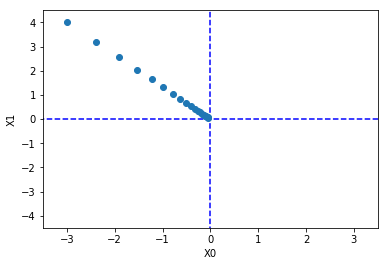

In [23]:
def gradient_descent_plt(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

lr = 0.1
step_num = 20
x, x_history = gradient_descent_plt(func1, np.array([-3.0,4.0]), lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [6]:
def softmax(a):
    c = np.max(a)
    exp_a= np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [7]:
net = SimpleNet()
print(net.W)

[[ 0.3780229  -0.76793745 -1.19479352]
 [-0.59362813  1.36446206  0.72286274]]


In [9]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.30745157  0.76725338 -0.06629964]


In [10]:
np.argmax(p)

1

In [11]:
t = np.array([0,1,0])
net.loss(x,t)

0.5743078394777154

### 신경망학습

In [24]:
def sigmoid(x):
        return 1 / (1+np.exp(-x))
    
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [25]:
net = TwoLayerNet(input_size=784, hidden_size=100,output_size=10)

In [26]:
net.params['W1'].shape

(784, 100)

In [27]:
net.params['W2'].shape

(100, 10)

In [30]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

In [32]:
x.shape

(100, 784)

In [31]:
grads = net.numerical_gradient(x,t)

IndexError: index 784 is out of bounds for axis 0 with size 784

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)